# Introduction  

This notebook generates some figures that I generated for the 2022 Western-Fields School in Networks and Neuroscience. The full program is here 

https://uwo.ca/academy/themes/neural_networks/2022_western_fields_school.html

I use the Python package Networkx to generate these figures. You can see the documentation of this package here 

https://networkx.org/


In order to use the package, we need to import first. 

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from numpy import savetxt


There are many built in functions in Networkx that we can use. For example, we can produce a complete graph on $n$ nodes.

In [2]:
n=5
G = nx.complete_graph(n)

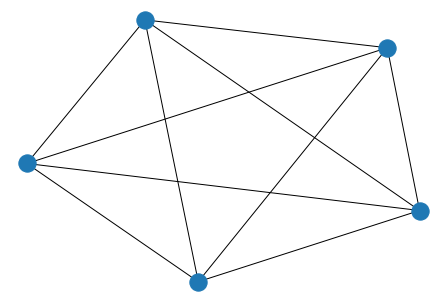

In [3]:
nx.draw(G)

Here are some functions that I wrote to produce the graphs that I introduced in the lecture.

In [4]:
def complete_graph(n):
    g=nx.empty_graph()
    for i in range(0,n):
        for j in range(0, n):
            if i !=j: 
                g.add_edge(i,j)
    return g      

def cycle_graph(n):
    g=nx.Graph()
    for i in range(0,n-1):
        g.add_edge(i, i+1)
    g.add_edge(n-1, 0)    
    return g    

def paley(q):
    squares = set([(a**2)%q for a in range(1,q)])
    g=nx.empty_graph(q)
    for i in range(0,q):
        for j in range(0,q):
            if (i-j)%q in squares:
                g.add_edge(i,j)
    return g  

def ring_graph(N,k):
    g = nx.empty_graph(N)
    for i in range(0,N):
        for j in range(0,N):
            if (i-j)% N !=0 and (i-j)%N <=k:
                g.add_edge(i,j)
    return g            
                

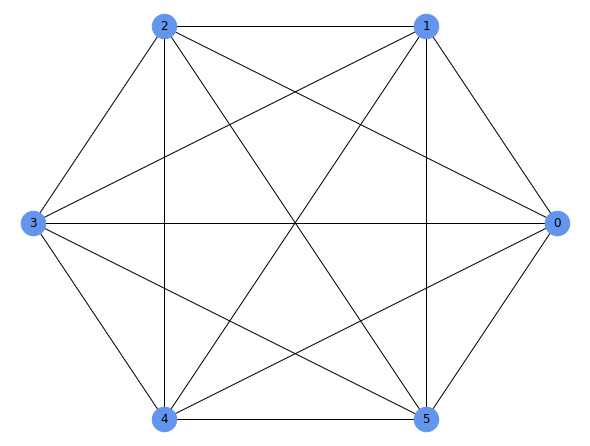

In [7]:
#complete graph on 6 nodes 
fig = plt.gcf()
fig.set_size_inches(8,6)
g1 = complete_graph(6)
nx.draw_circular(g1, with_labels = True,
                node_size = 600,
                node_color = '#6495ED')


In [10]:
A1 = nx.nx.adjacency_matrix(g1)
print(A1.todense())

[[0 1 1 1 1 1]
 [1 0 1 1 1 1]
 [1 1 0 1 1 1]
 [1 1 1 0 1 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 0]]


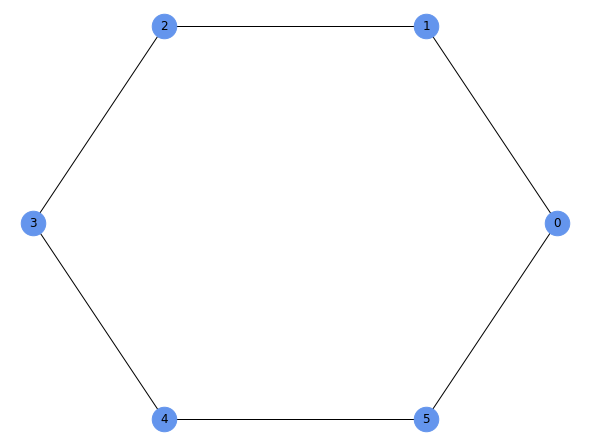

In [11]:
fig = plt.gcf()
fig.set_size_inches(8,6)
g2 = cycle_graph(6)
nx.draw_circular(g2, with_labels = True,
                node_size = 600,
                 scale = 2,
                node_color = '#6495ED')


In [12]:
A2 = nx.nx.adjacency_matrix(g2)
print(A2.todense())

[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]


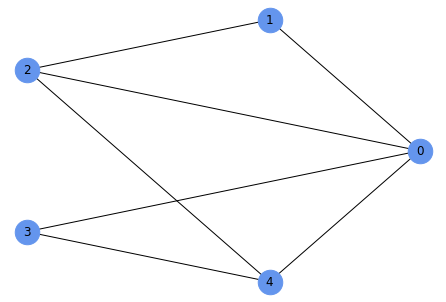

In [27]:
#a random graph with 5 nodes 
g3 = nx.erdos_renyi_graph(n=5, p = 0.5)
nx.draw_circular(g3, with_labels = True,
                node_size = 600,
                 scale = 2,
                node_color = '#6495ED')
plt.savefig("random_graph.png", dpi =300)

In [29]:
A3 = nx.nx.adjacency_matrix(g3)
print(A3.todense())

[[0 1 1 1 1]
 [1 0 1 0 0]
 [1 1 0 0 1]
 [1 0 0 0 1]
 [1 0 1 1 0]]


In [43]:
A =  A3.todense()
savetxt('random_graph.csv', A, delimiter=',')


In [44]:
savetxt(name='random_graph.txt', A, fmt ='%.0f\n')


SyntaxError: positional argument follows keyword argument (<ipython-input-44-4efe1b25c2b3>, line 1)